In [1]:
# http://archive.ics.uci.edu/dataset/352/online+retail

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Kalpataru Group/Customer Segmentation/Online Retail.csv",
                     encoding ='unicode_escape', parse_dates = True)
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
# Check the shape
data.shape

(541909, 8)

In [5]:
# Customer distribution by country

country_customer_data = data[['Country', 'CustomerID']].drop_duplicates()

In [6]:
country_customer_data.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID',
                                                                                                      ascending = False)

,Country,CustomerID
36,United Kingdom,3950
14,Germany,95
13,France,87
31,Spain,31
3,Belgium,25
33,Switzerland,21
27,Portugal,19
19,Italy,15
12,Finland,12
1,Austria,11


In [7]:
# keeping only UK data
data = data.query("Country == 'United Kingdom'").reset_index(drop=True)

In [8]:
# Check for missing values
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

In [9]:
data.shape

(495478, 8)

In [10]:
 # Remove missing values from CustomerID column

 data = data[pd.notnull(data['CustomerID'])]

In [11]:
495478 - 133600

361878

In [12]:
data.shape

(361878, 8)

In [13]:
# validate if there are any negative values in Quantity Column

data.Quantity.min()

-80995

In [14]:
len(data[data.Quantity <= 0])

7533

In [15]:
data.shape

(361878, 8)

In [16]:
# filter out records with negative values
data = data[data.Quantity > 0]

In [17]:
data.shape

(354345, 8)

In [18]:
361878 - 7533

354345

In [19]:
# validate if there are any negative values in UnitPrice Column
data.UnitPrice.min()

0.0

In [20]:
len(data[data.UnitPrice <= 0])

24

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354345 entries, 0 to 495477
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    354345 non-null  object 
 1   StockCode    354345 non-null  object 
 2   Description  354345 non-null  object 
 3   Quantity     354345 non-null  int64  
 4   InvoiceDate  354345 non-null  object 
 5   UnitPrice    354345 non-null  float64
 6   CustomerID   354345 non-null  float64
 7   Country      354345 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 24.3+ MB


In [22]:
# convert the string date field to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354345 entries, 0 to 495477
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    354345 non-null  object        
 1   StockCode    354345 non-null  object        
 2   Description  354345 non-null  object        
 3   Quantity     354345 non-null  int64         
 4   InvoiceDate  354345 non-null  datetime64[ns]
 5   UnitPrice    354345 non-null  float64       
 6   CustomerID   354345 non-null  float64       
 7   Country      354345 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.3+ MB


In [24]:
# Add new_column depicting total amount

data['TotalAmount'] = data['Quantity'] * data['UnitPrice']

In [25]:
data.shape

(354345, 9)

In [26]:
data.CustomerID.nunique()

3921

In [27]:
data.StockCode.nunique()

3645

In [28]:
# RFM Modelling - Recency, Frequency, Monetary

In [29]:
# Recency = Latest date - Last Invoice Data,
# Frequency = Count of invoice no.of transactions,
# Monetary = Sum of Total Amount for each customer

In [30]:
data['InvoiceDate'].sort_values().tail()

495463   2011-12-09 12:31:00
495476   2011-12-09 12:49:00
495474   2011-12-09 12:49:00
495475   2011-12-09 12:49:00
495477   2011-12-09 12:49:00
Name: InvoiceDate, dtype: datetime64[ns]

In [31]:
data['InvoiceDate'].max()

Timestamp('2011-12-09 12:49:00')

In [32]:
data['InvoiceDate'].min()

Timestamp('2010-12-01 08:26:00')

In [33]:
(data['InvoiceDate'].max() - data['InvoiceDate'].min()).days

373

In [34]:
data.groupby(['CustomerID'])['InvoiceDate'].max().head()

CustomerID
12346.0   2011-01-18 10:01:00
12747.0   2011-12-07 14:34:00
12748.0   2011-12-09 12:20:00
12749.0   2011-12-06 09:56:00
12820.0   2011-12-06 15:12:00
Name: InvoiceDate, dtype: datetime64[ns]

In [35]:
import datetime as dt

# Set latest date 2011-12-10 as last invoice date was 2011-12-09.
# This is to calculate the number of days from recent purchase

Latest_Date = dt.datetime(2011,12,10)

In [36]:
# Create RFM modelling scores for each customer
RFMScores = data.groupby('CustomerID').agg({'InvoiceDate' : lambda x : (Latest_Date - x.max()).days,
                                            'InvoiceNo' : lambda x: len(x),
                                            'TotalAmount' : lambda x: sum(x)})

In [37]:
data.groupby(['CustomerID'])['TotalAmount'].sum().head()

CustomerID
12346.0    77183.60
12747.0     4196.01
12748.0    33719.73
12749.0     4090.88
12820.0      942.34
Name: TotalAmount, dtype: float64

In [38]:
RFMScores.head()

,InvoiceDate,InvoiceNo,TotalAmount
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34


In [39]:
RFMScores.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 3921 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceDate  3921 non-null   int64  
 1   InvoiceNo    3921 non-null   int64  
 2   TotalAmount  3921 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 122.5 KB


In [40]:
  # Rename Column names to Recency, frequency and Monetary

  RFMScores.rename(columns= {'InvoiceDate' : 'Recency',
                             'InvoiceNo'   : 'Frequency',
                             'TotalAmount' : 'Monetary'}, inplace = True)

  RFMScores.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34


In [41]:
  RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4596,33719.73
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34


In [42]:
# Descriptive statistics (Recency)

RFMScores.Recency.describe()

count    3921.000000
mean       91.722265
std        99.528532
min         0.000000
25%        17.000000
50%        50.000000
75%       142.000000
max       373.000000
Name: Recency, dtype: float64

<ipython-input-43-4055c2b14c85>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x)


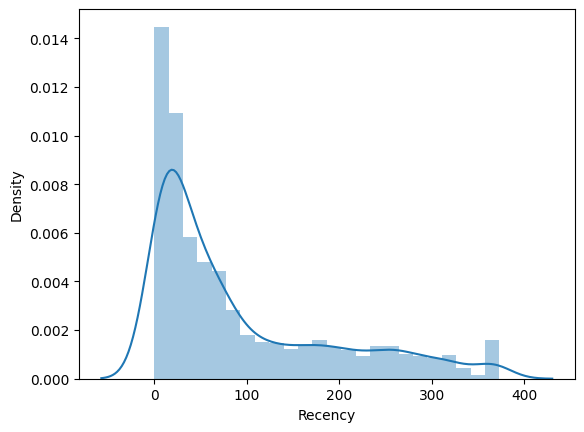

In [43]:
# Recency distribution Plot

import seaborn as sns

x = RFMScores['Recency']

ax = sns.distplot(x)

In [44]:
# Descriptive statistics (Frequency)

RFMScores.Frequency.describe()

count    3921.000000
mean       90.371079
std       217.796155
min         1.000000
25%        17.000000
50%        41.000000
75%        99.000000
max      7847.000000
Name: Frequency, dtype: float64

<ipython-input-45-7c87b585b8c3>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x)


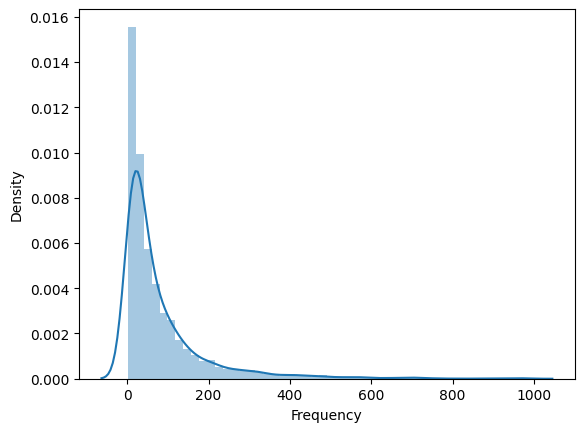

In [45]:
# Frequency Distribution plot, taking observations which have frequency less than 1000
x = RFMScores.query('Frequency < 1000')['Frequency']

ax = sns.distplot(x)

In [46]:
# Descriptive Statistics (Monetary)

RFMScores.Monetary.describe()

count      3921.000000
mean       1863.910113
std        7481.922217
min           0.000000
25%         300.040000
50%         651.820000
75%        1575.890000
max      259657.300000
Name: Monetary, dtype: float64

<ipython-input-47-673d68fd0016>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x)


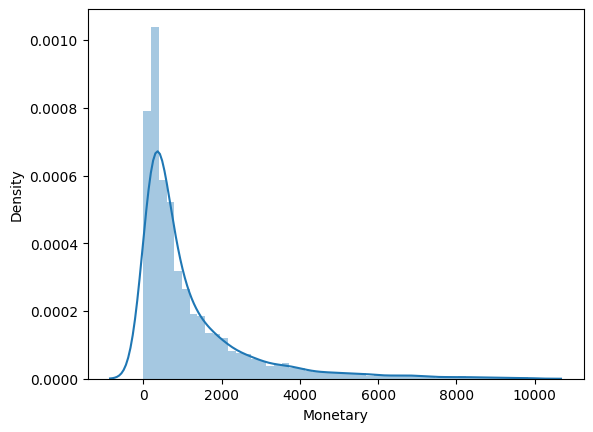

In [47]:
# Monetary distribution Plot, taking observations which have monetary value less than 10,000 pounds

x = RFMScores.query('Monetary < 10000')['Monetary']
ax = sns.distplot(x)

In [48]:
# Split into 4 segments using quantiles

quantiles = RFMScores.quantile(q = [0.25, 0.5, 0.75])
quantiles = quantiles.to_dict()

In [49]:
quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 99.0},
 'Monetary': {0.25: 300.03999999999996,
  0.5: 651.8200000000002,
  0.75: 1575.8900000000003}}

In [50]:
# Functions to create R, F and M segments

def RScoring(x,p,d):
  if x <= d[p][0.25]:
    return 1
  elif x <= d[p][0.50]:
    return 2
  elif x <= d[p][0.75]:
    return 3
  else:
    return 4

def FnMScoring(x,p,d):
  if x <= d[p][0.25]:
    return 4
  elif x<= d[p][0.50]:
    return 3
  elif x<= d[p][0.75]:
    return 2
  else:
    return 1


In [51]:
# Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values

RFMScores['R'] = RFMScores['Recency'].apply(RScoring, args = ('Recency', quantiles,))
RFMScores['F'] = RFMScores['Frequency'].apply(FnMScoring, args = ('Frequency', quantiles,))
RFMScores['M'] = RFMScores['Monetary'].apply(FnMScoring, args = ('Monetary', quantiles,))
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12747.0,2,103,4196.01,1,1,1
12748.0,0,4596,33719.73,1,1,1
12749.0,3,199,4090.88,1,1,1
12820.0,3,59,942.34,1,2,2


In [52]:
# calculate and Add RFMGroup value column showing combined concatenated score of RFM

RFMScores['RFMGroup'] = RFMScores.R.map(str) + RFMScores.F.map(str) + RFMScores.M.map(str)

# Calculate and add RFMScore value column showing total sum of RFMGroup values
RFMScores['RFMScore'] = RFMScores[['R', 'F', 'M']].sum(axis=1)

RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12747.0,2,103,4196.01,1,1,1,111,3
12748.0,0,4596,33719.73,1,1,1,111,3
12749.0,3,199,4090.88,1,1,1,111,3
12820.0,3,59,942.34,1,2,2,122,5


In [53]:
sorted(RFMScores.RFMScore.unique())

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [54]:
# Assign Loyalty Level to each customer
Loyalty_Level = ['Platinum', 'Gold', 'Silver', 'Bronze']
score_cuts = pd.qcut(RFMScores.RFMScore, q = 4, labels = Loyalty_Level)
RFMScores['RFM_Loyalty_Level'] = score_cuts.values
RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,12346.0,325,1,77183.60,4,4,1,441,9,Silver
1,12747.0,2,103,4196.01,1,1,1,111,3,Platinum
2,12748.0,0,4596,33719.73,1,1,1,111,3,Platinum
3,12749.0,3,199,4090.88,1,1,1,111,3,Platinum
4,12820.0,3,59,942.34,1,2,2,122,5,Platinum


In [55]:
# validate the data for RFMGroup = 111

RFMScores[RFMScores['RFMGroup'] == '111'].sort_values('Monetary', ascending = False).head(5)

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
CustomerID,,,,,,,,,
18102.0,0,431,259657.30,1,1,1,111,3,Platinum
17450.0,8,337,194550.79,1,1,1,111,3,Platinum
17511.0,2,963,91062.38,1,1,1,111,3,Platinum
16684.0,4,277,66653.56,1,1,1,111,3,Platinum
14096.0,4,5111,65164.79,1,1,1,111,3,Platinum


In [56]:
!pip install chart_studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 4.3 MB/s eta 0:00:00


In [57]:
import chart_studio as cs
import plotly.offline as po
import plotly.graph_objs as gobj

# Recency vs Frequency

graph = RFMScores.query("Monetary < 50000 and Frequency < 2000")

plot_data = [
    gobj.Scatter(
        x = graph.query("RFM_Loyalty_Level == 'Bronze'")['Recency'],
        y = graph.query("RFM_Loyalty_Level == 'Bronze'")['Frequency'],
        mode = 'markers',
        name = 'Bronze',
        marker = dict(size = 7,
                      line = dict(width=1),
        color = 'blue',
        opacity = 0.8)
    ),

    gobj.Scatter(
        x = graph.query("RFM_Loyalty_Level == 'Silver'")['Recency'],
        y = graph.query("RFM_Loyalty_Level == 'Silver'")['Frequency'],
        mode = 'markers',
        name = 'Silver',
        marker = dict(size = 9,
                      line = dict(width=1),
        color = 'green',
        opacity = 0.5)
    ),

    gobj.Scatter(
        x = graph.query("RFM_Loyalty_Level == 'Gold'")['Recency'],
        y = graph.query("RFM_Loyalty_Level == 'Gold'")['Frequency'],
        mode = 'markers',
        name = 'Gold',
        marker = dict(size = 11,
                      line = dict(width=1),
        color = 'red',
        opacity = 0.9)
    ),

    gobj.Scatter(
        x = graph.query("RFM_Loyalty_Level == 'Platinum'")['Recency'],
        y = graph.query("RFM_Loyalty_Level == 'Platinum'")['Frequency'],
        mode = 'markers',
        name = 'Platinum',
        marker = dict(size = 13,
                      line = dict(width=1),
        color = 'black',
        opacity = 0.9)
    )
]

In [58]:
plot_layout = gobj.Layout(
    yaxis = {'title' : "Frequency"},
    xaxis = {'title' : "Recency"},
    title = 'Segments')
fig = gobj.Figure(data = plot_data, layout = plot_layout)
po.iplot(fig)

In [59]:
# Frequency Vs Monetary

graph = RFMScores.query("Monetary < 50000 and Frequency < 2000")

plot_data = [
    gobj.Scatter(
        x = graph.query("RFM_Loyalty_Level == 'Bronze'")['Frequency'],
        y = graph.query("RFM_Loyalty_Level == 'Bronze'")['Monetary'],
        mode = 'markers',
        name = 'Bronze',
        marker = dict(size = 7,
                      line = dict(width=1),
        color = 'blue',
        opacity = 0.8)
    ),

    gobj.Scatter(
        x = graph.query("RFM_Loyalty_Level == 'Silver'")['Frequency'],
        y = graph.query("RFM_Loyalty_Level == 'Silver'")['Monetary'],
        mode = 'markers',
        name = 'silver',
        marker = dict(size = 9,
                      line = dict(width=1),
        color = 'green',
        opacity = 0.5)
    ),

    gobj.Scatter(
        x = graph.query("RFM_Loyalty_Level == 'Gold'")['Frequency'],
        y = graph.query("RFM_Loyalty_Level == 'Gold'")['Monetary'],
        mode = 'markers',
        name = 'Gold',
        marker = dict(size = 11,
                      line = dict(width=1),
        color = 'red',
        opacity = 0.9)
    ),

    gobj.Scatter(
        x = graph.query("RFM_Loyalty_Level == 'Platinum'")['Frequency'],
        y = graph.query("RFM_Loyalty_Level == 'Platinum'")['Monetary'],
        mode = 'markers',
        name = 'Platinum',
        marker = dict(size = 13,
                      line = dict(width=1),
        color = 'black',
        opacity = 0.9)
    )
]

In [60]:
plot_layout = gobj.Layout(
    yaxis = {'title' : "Monetary"},
    xaxis = {'title' : "Frequency"},
    title = 'Segments'
)

fig = gobj.Figure(data = plot_data, layout = plot_layout)
po.iplot(fig)

In [61]:
# Recency Vs Monetary

graph = RFMScores.query("Monetary < 50000 and Frequency < 2000")

plot_data = [
    gobj.Scatter(
        x = graph.query("RFM_Loyalty_Level == 'Bronze'")['Recency'],
        y = graph.query("RFM_Loyalty_Level == 'Bronze'")['Monetary'],
        mode = 'markers',
        name = 'Bronze',
        marker = dict(size = 7,
                      line = dict(width = 1),
        color = 'blue',
        opacity = 0.8)
    ),

    gobj.Scatter(
        x = graph.query("RFM_Loyalty_Level == 'Silver'")['Recency'],
        y = graph.query("RFM_Loyalty_Level == 'Silver'")['Monetary'],
        mode = 'markers',
        name = 'Silver',
        marker = dict(size = 9,
                      line = dict(width=1),
                      color = 'green',
                      opacity = 0.5)
    ),

    gobj.Scatter(
        x = graph.query("RFM_Loyalty_Level == 'Gold'")['Recency'],
        y = graph.query("RFM_Loyalty_Level == 'Gold'")['Monetary'],
        mode = 'markers',
        name = 'Gold',
        marker = dict(size = 11,
                      line = dict(width=1),
                      color = 'red',
                      opacity = 0.9)
    ),

    gobj.Scatter(
        x = graph.query("RFM_Loyalty_Level == 'Platinum'")['Recency'],
        y = graph.query("RFM_Loyalty_Level == 'Platinum'")['Monetary'],
        mode = 'markers',
        name = 'Platinum',
        marker = dict(size = 13,
                      line = dict(width=1),
                      color = 'black',
                      opacity = 0.9)
    )
]

In [62]:
plot_layout = gobj.Layout(
    yaxis = {'title' : "Monetary"},
    xaxis = {'title' : "Recency"},
    title = 'Segments')

fig = gobj.Figure(data = plot_data, layout = plot_layout)
po.iplot(fig)

In [63]:
# K-Means Clustering

In [64]:
len(RFMScores[RFMScores.Recency == 0])

28

In [65]:
len(RFMScores[RFMScores.Frequency == 0])

0

In [66]:
len(RFMScores[RFMScores.Monetary == 0])

1

In [67]:
bronze = RFMScores[RFMScores.RFM_Loyalty_Level == 'Bronze']
bronze.RFMScore.unique()

array([12, 11])

In [68]:
silver = RFMScores[RFMScores.RFM_Loyalty_Level == 'Silver']
silver.RFMScore.unique()

array([ 9, 10])

In [69]:
# handle negative and zero values so as to handle infinite numbers during log transformations

def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num

In [70]:
# Apply handle_neg_n_zero function to Recency and Monetary columns

RFMScores['Recency'] = [handle_neg_n_zero(x) for x in RFMScores.Recency]
RFMScores['Monetary'] = [handle_neg_n_zero(x) for x in RFMScores.Monetary]

In [71]:
# perform log transformation to bring data into normal or near normal distribution

log_data = RFMScores[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

In [72]:
log_data.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,5.784,0.000,11.254
1,12747.0,0.693,4.635,8.342
2,12748.0,0.000,8.433,10.426
3,12749.0,1.099,5.293,8.317
4,12820.0,1.099,4.078,6.848


<ipython-input-73-705b80033da6>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Recency', ylabel='Density'>

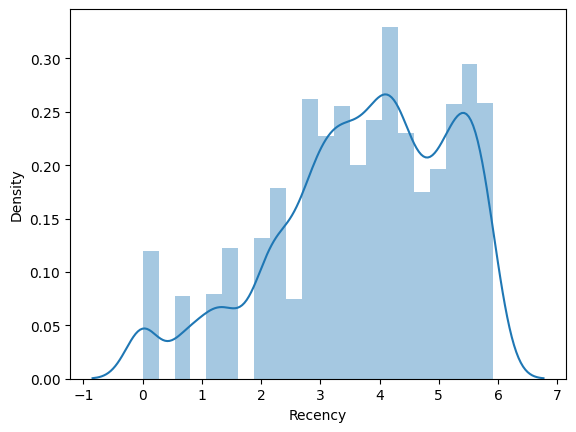

In [73]:
# Data distribution after data normalization for Recency

Recency_plot = log_data['Recency']
sns.distplot(Recency_plot)

<ipython-input-74-ac9841006ef0>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Frequency', ylabel='Density'>

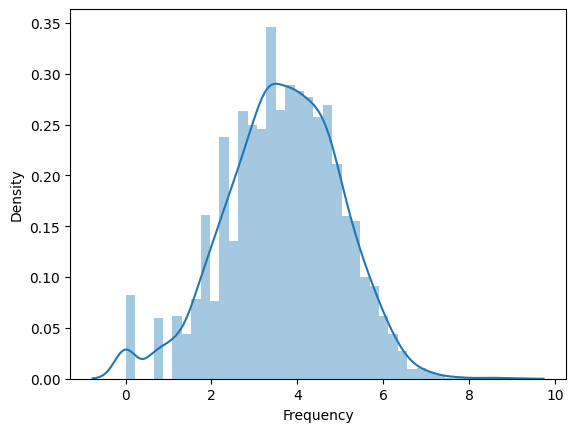

In [74]:
# Data Distribution after data normalization for Frequency

Frequency_plot = log_data['Frequency']
sns.distplot(Frequency_plot)

<ipython-input-75-05fd949b9031>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Monetary', ylabel='Density'>

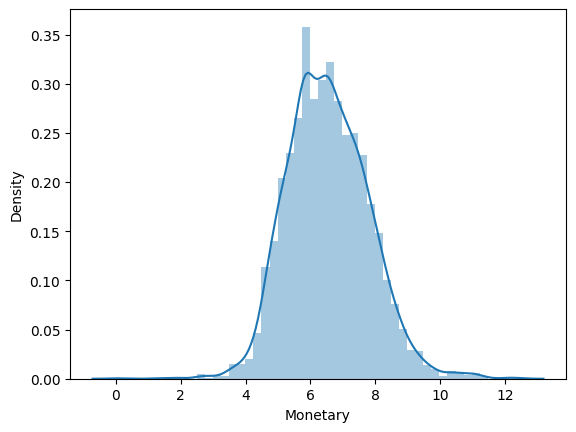

In [75]:
# Data Distribution after data normalization for Monetary

Monetary_plot = log_data['Monetary']
sns.distplot(Monetary_plot)

In [76]:
from sklearn.preprocessing import StandardScaler

# Bring the data on same scale

sc = StandardScaler()
scaled_data = sc.fit_transform(log_data)

In [77]:
# transform it back to dataframe

scaled_data = pd.DataFrame(scaled_data, index = RFMScores.index, columns= log_data.columns)

In [78]:
scaled_data.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,1.389971,-2.733639,3.766415
12747.0,-2.061189,0.726978,1.439009
12748.0,-2.530970,3.562667,3.104639
12749.0,-1.785964,1.218258,1.419028
12820.0,-1.785964,0.311106,0.244935


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

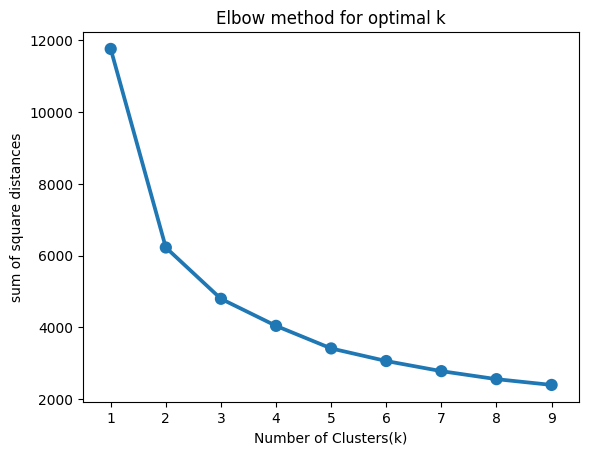

In [80]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,10):
  km = KMeans(n_clusters= k, init = 'k-means++', max_iter=100)
  km = km.fit(scaled_data)
  sum_of_sq_dist[k] = km.inertia_

# plot the graph for the sum of square distance values and number of clusters
sns.pointplot(x= list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('sum of square distances')
plt.title('Elbow method for optimal k')
plt.show()

In [81]:
# perform k-mean clustering or build the k-means clustering model

kmean_clust = KMeans(n_clusters = 3, init = 'k-means++', max_iter= 100)
kmean_clust.fit(scaled_data)

# find the clusters for the observation given in the dataset
RFMScores['Cluster'] = kmean_clust.labels_
RFMScores.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster
CustomerID,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,Silver,2
12747.0,2,103,4196.01,1,1,1,111,3,Platinum,1
12748.0,1,4596,33719.73,1,1,1,111,3,Platinum,1
12749.0,3,199,4090.88,1,1,1,111,3,Platinum,1
12820.0,3,59,942.34,1,2,2,122,5,Platinum,1


<Axes: xlabel='Recency', ylabel='Frequency'>

<Figure size 700x700 with 0 Axes>

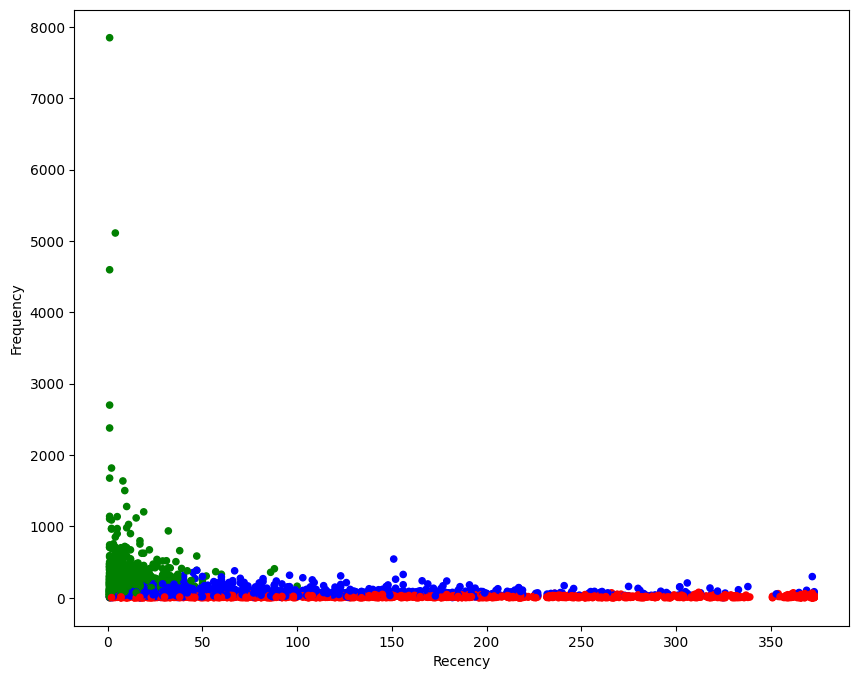

In [82]:
from matplotlib import pyplot as plt

plt.figure(figsize=(7,7))

# scatter plot Frequency vs Recency

colors = ["red", "green", "blue"]
RFMScores['color'] = RFMScores['Cluster'].map(lambda p: colors[p])
RFMScores.plot(kind = "scatter",
               x = "Recency", y = "Frequency",
               figsize = (10,8),
               c = RFMScores['color'])

In [83]:
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster,color
CustomerID,,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,Silver,2,blue
12747.0,2,103,4196.01,1,1,1,111,3,Platinum,1,green
12748.0,1,4596,33719.73,1,1,1,111,3,Platinum,1,green
12749.0,3,199,4090.88,1,1,1,111,3,Platinum,1,green
12820.0,3,59,942.34,1,2,2,122,5,Platinum,1,green
